# Milestone: Neural Networks for Hand Sign Recognition, Multiclass

In this project, we use a neural network to recognize the hand sign letters of the American Sign Language alphabet, with the exceptions of J and Z due to their motion requirements.

# Outline
- [ 0 - Installation ](#0)
- [ 1 - Packages ](#1)
- [ 2 - ReLU Activation](#2)
- [ 3 - Softmax Function](#3)
- [ 4 - Data Preprocessing and Model Definition](#4)
- [ 5 - Cross Validation ](#5)
- [ 6 - CNN model](#6)
- [ 7 - Regularization](#7)
- [ 8 - Visualisation](#8)




<a name="0"></a>
## 0 - Installation
Skip this part if you already have installed opencv-python, scikit-learn and tensorflow.

In [72]:
!pip install opencv-python

In [73]:
!pip install numpy scikit-learn seaborn matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.22.4 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.



  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2


In [74]:
!pip install tensorflow

  Using cached numpy-1.26.2-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.2 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.26.2 which is incompatible.


<a name="1"></a>
## 1 - Packages

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

from sklearn.metrics import confusion_matrix
import seaborn as sns

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from assigment_utils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

char = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

c:\Users\driwo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a name="2"></a>
## 2 - Image Data Loading

The provided Python code defines a `load_data` function to load and preprocess image data from a specified directory.

It uses OpenCV to read and resize images to 28x28 pixels.

The data directory should contain subdirectories, each representing a different label or category.

In [2]:
import os
import cv2
import numpy as np

def load_data(data_directory):
    # Get a list of subdirectories (each representing a different character)
    subdirectories = [d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory, d))]

    # Initialize empty lists to store images and labels
    images = []
    labels = []

    # Iterate over each subdirectory
    for label in subdirectories:
        label_directory = os.path.join(data_directory, label)
        print(label)
        # Get a list of image files in the subdirectory
        image_files = [f for f in os.listdir(label_directory) if f.endswith(".jpg")]  # Adjust the file extension accordingly

        # Read each image and append it to the list
        for image_file in image_files:
            image_path = os.path.join(label_directory, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (28, 28))
            images.append(image)
            labels.append(label)

    # Convert the lists to numpy arrays
    X = np.array(images)
    X_reshaped = X.reshape(X.shape[0], -1)
    Y = np.array(labels)
    y = Y.reshape(-1, 1)
    return X_reshaped, y

print('Can take several minutes!')
# Provide the path to your main data directory containing subdirectories 
print('training data:') 
data_directory = "data/Train"
X_train, y_train = load_data(data_directory)

print('CV data:') 
data_directory = "data/CV"
X_cv, y_cv = load_data(data_directory)

print('testing data:') 
data_directory = "data/Test"
X_test, y_test = load_data(data_directory)


Can take several minutes!
training data:
A
B
C
D
E
F
G
H
I
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
CV data:
A
B
C
D
E
F
G
H
I
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
testing data:
A
B
C
D
E
F
G
H
I
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y


#### 2.1 View the variables
Let's get more familiar with the dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints the first element in the variables `X` and `y`.  

In [3]:
print ('The first element of X is: ', X_train[0])

The first element of X is:  [186 187 188 189 189 189 188 188 189 188 195 183 192 181 187 184 186 186
 179 183 181 181 186 173 175 178 179 174 189 189 189 189 188 188 188 187
 186 184 185 187 201 195 193 193 192 180 187 201 181 180 180 184 189 175
 170 179 192 191 190 189 188 188 188 188 186 193 188 188 190 186 181 191
 197 190 179 181 182 189 151 182 175 185 187 180 192 191 190 189 189 190
 191 191 190 199 192 192 193 192 165 147 138 170 151 121 142 170 112 163
 183 183 184 181 191 191 191 191 191 192 193 194 198 194 192 188 193 192
 155 100  60 100 128  85  71 129 110 114 211 175 162 183 191 192 193 194
 194 194 193 193 198 180 196 165 131 115 135 108  74  48 118 100  44 114
 142  54 168 183 188 179 193 195 196 197 196 193 190 188 170 132 180 144
  81  39 117 130 117  52 119 118  60  91 152  59  83 161 205 181 196 197
 199 199 197 192 187 184 130  67 144 145 101  39 119 123 103  68 124 114
  67  41 129 118  48 102 165 194 196 192 193 194 202 194 172 173 147  84
 121 156 119  75  80 13

In [4]:
print ('The first element of y is: ', y_train[0,0])
print ('The last element of y is: ', y_train[-1,0])

The first element of y is:  A
The last element of y is:  Y


#### 2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [5]:
print ('The shape of X is: ' + str(X_train.shape))
print ('The shape of y is: ' + str(y_train.shape))
print ('The shape of X is: ' + str(X_cv.shape))
print ('The shape of y is: ' + str(y_cv.shape))
print ('The shape of X is: ' + str(X_test.shape))
print ('The shape of y is: ' + str(y_test.shape))

The shape of X is: (20400, 784)
The shape of y is: (20400, 1)
The shape of X is: (6949, 784)
The shape of y is: (6949, 1)
The shape of X is: (7200, 784)
The shape of y is: (7200, 1)


#### 2.3 Visualizing the Data

Visualizing a subset of the training set.
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 28 pixel by 28 pixel grayscale image and displays the images together.
- The label for each image is displayed above the image

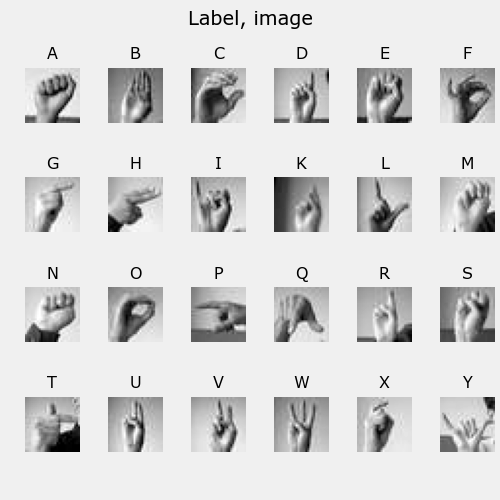

In [6]:
# Code Assigments starts here


import warnings
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X_train.shape

fig, axes = plt.subplots(4,6, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices

    j = i*850
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[j].reshape((28,28))

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y_train[j,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

# Code Assigments stops here

<a name="3"></a>
## 3 - Softmax Function
A multiclass neural network generates N outputs. One output is selected as the predicted answer. In the output layer, a vector $\mathbf{z}$ is generated by a linear function which is fed into a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will sum to 1. They can be interpreted as probabilities. The larger inputs to the softmax will correspond to larger output probabilities.

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


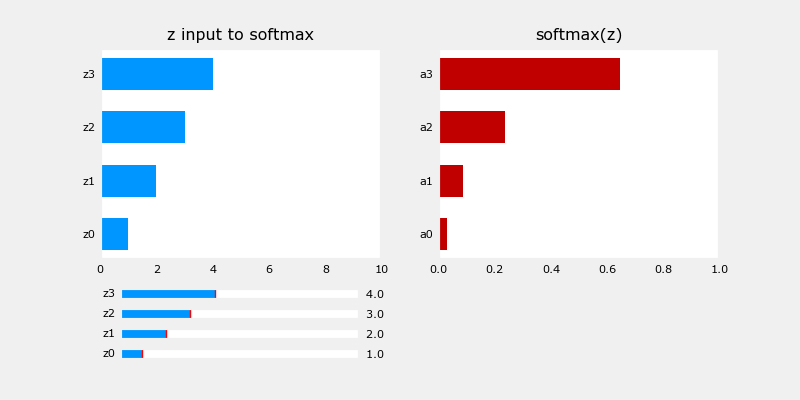

In [7]:
# Code Assigments starts here

# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """
    ### START CODE HERE ###
    a = (np.exp(z) / np.sum(np.exp(z)))
    ### END CODE HERE ###
    return a


z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST
test_my_softmax(my_softmax)
# END UNIT TEST


plt.close("all")
plt_softmax(my_softmax)

# Code Assigments stops here


<a name="4"></a>
## 4 - Data Preprocessing and Model Definition

The following code segment demonstrates the preprocessing steps for image data and the definition of a neural network model using TensorFlow and Keras.

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Normalize pixel values
X_normalized = X_train / 255

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# One-hot encode the integer labels
onehot_encoder = OneHotEncoder(sparse=False)
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))

X_train_model = X_normalized
y_train_model = y_train_onehot

# Define your model
model = Sequential([
    tf.keras.Input(shape=(X_train_model.shape[1],)),
    Dense(128, activation='relu', name="L1"),
    Dense(64, activation='relu', name="L2"),
    Dense(24, activation='softmax', name="L3"),
], name="my_model")

# Compile the model with CategoricalCrossentropy
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

c:\Users\driwo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 128)               100480    
                                                                 
 L2 (Dense)                  (None, 64)                8256      
                                                                 
 L3 (Dense)                  (None, 24)                1560      
                                                                 
Total params: 110296 (430.84 KB)
Trainable params: 110296 (430.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Training and Evaluation

The following code snippet illustrates the training process of the defined neural network model and its evaluation on a test set.

In [9]:
# Code Assigment starts here

# Train the model 
history = model.fit(X_train_model, y_train_model, epochs=30, validation_split=0.0)

# Code Assigment stops here

Epoch 1/30


c:\Users\driwo\anaconda3\lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


638/638 [==============================] - 2s 2ms/step - loss: 2.2458 - accuracy: 0.3168
Epoch 2/30
638/638 [==============================] - 1s 2ms/step - loss: 1.2783 - accuracy: 0.5867
Epoch 3/30
638/638 [==============================] - 1s 2ms/step - loss: 0.9477 - accuracy: 0.6907
Epoch 4/30
638/638 [==============================] - 1s 2ms/step - loss: 0.7398 - accuracy: 0.7586
Epoch 5/30
638/638 [==============================] - 1s 2ms/step - loss: 0.5846 - accuracy: 0.8147
Epoch 6/30
638/638 [==============================] - 1s 2ms/step - loss: 0.4627 - accuracy: 0.8546
Epoch 7/30
638/638 [==============================] - 2s 2ms/step - loss: 0.3779 - accuracy: 0.8817
Epoch 8/30
638/638 [==============================] - 1s 2ms/step - loss: 0.2889 - accuracy: 0.9134
Epoch 9/30
638/638 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9183
Epoch 10/30
638/638 [==============================] - 2s 3ms/step - loss: 0.1808 - accuracy: 0.9502
Epoch 11/3

### Plot Training Loss

The following code segment includes a function call to visualize the training loss over epochs using a custom function `plot_loss_tf`.

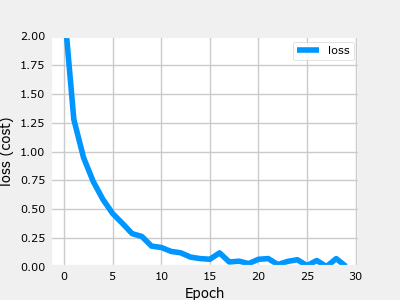

In [10]:
plot_loss_tf(history)

<a name="5"></a>
## 5 - Testing the model with the CV data

In [11]:
# ********** Normal model **********

# Normal model being the one up above!
y_cv_model = label_encoder.fit_transform(y_cv.ravel())

model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)

training_cerr_normal = eval_cat_err(y_train_encoded, model_predict(X_train_model))
cv_cerr_normal = eval_cat_err(y_cv_model, model_predict(X_cv))
print(f"categorization error, training, normal model: {training_cerr_normal:0.3f}")
print(f"categorization error, cv,       normal model: {cv_cerr_normal:0.3f}")

218/218 [==============================] - 0s 992us/step
categorization error, training, normal model: 0.000
categorization error, cv,       normal model: 0.229


Very simpel model that is not good

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_simple_1 (Dense)      (None, 24)                18840     
                                                                 
 output_layer_simple (Dense  (None, 24)                600       
 )                                                               
                                                                 
Total params: 19440 (75.94 KB)
Trainable params: 19440 (75.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
638/638 [==============================] - 1s 1ms/step - loss: 2.8209 - accuracy: 0.1570
Epoch 2/50
638/638 [==============================] - 1s 1ms/step - loss: 2.0625 - accuracy: 0.3740
Epoch 3/50
638/638 [==============================] - 1s 1ms/step - loss: 1.6801 - accuracy: 0.4817
Epoch 4/50
638/638 [==============================] 

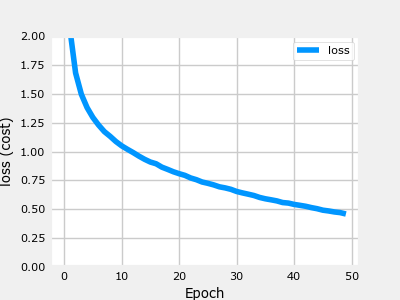

In [13]:
# ********** Simple model **********
# UNQ_C4
# GRADED CELL: model_s
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


# Code Assigment starts here

tf.random.set_seed(1234) # for consistent results
model_s = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(24, activation='relu', input_shape=(784,), name='dense_simple_1'),
    Dense(24, activation='linear', name='output_layer_simple')

], name="my_model")

model_s.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_s.summary()

# Code Assigment stops here


# BEGIN UNIT TEST
history = model_s.fit(
    X_train_model,y_train_model,
    epochs=50
)
# END UNIT TEST
plot_loss_tf(history)

In [14]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)

training_cerr_simple = eval_cat_err(y_train_encoded, model_predict_s(X_train_model))
cv_cerr_simple = eval_cat_err(y_cv_model, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, normal model: {training_cerr_normal:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, normal model: {cv_cerr_normal:0.3f}" )

218/218 [==============================] - 0s 853us/step
categorization error, training, simple model, 0.161, normal model: 0.000
categorization error, cv,       simple model, 0.492, normal model: 0.229


<a name="6"></a>
## 6 - CNN MODEL

Model: "my_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 Conv1 (Conv2D)              (None, 22, 22, 64)        3200      
                                                                 
 Conv2 (Conv2D)              (None, 20, 20, 64)        36928     
                                                                 
 Conv3 (Conv2D)              (None, 18, 18, 128)       73856     
                                                                 
 Conv4 (Conv2D)              (None, 16, 16, 128)       147584    
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 8, 8, 128)         0         
                                                                 
 MaxPool2 (MaxPooling2D)     (None, 4, 4, 128)        

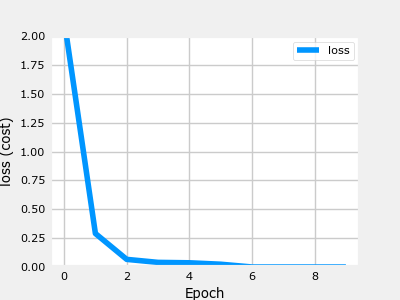

In [15]:
# ********** Complex model **********
# UNQ_C4
# GRADED CELL: model_c
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape



tf.random.set_seed(1234) # for consistent results
model_c = Sequential([

    tf.keras.Input(shape=(784,)),
    Reshape((28, 28, 1)),

    Conv2D(64, (7, 7), activation='relu', name="Conv1"),
    Conv2D(64, (3, 3), activation='relu', name="Conv2"),
    Conv2D(128, (3, 3), activation='relu', name="Conv3"),
    Conv2D(128, (3, 3), activation='relu', name="Conv4"),

    MaxPooling2D((2, 2), name="MaxPool1"),
    MaxPooling2D((2, 2), name="MaxPool2"),
    MaxPooling2D((2, 2), name="MaxPool3"),
    MaxPooling2D((2, 2), name="MaxPool4"),

    Flatten(name="Flatten"),
    
    Dense(512, activation='relu', name="Dense1"),
    Dense(256, activation='relu', name="Dense2"),
    
    Dense(24, activation='softmax',  name="Output")

], name="my_cnn_model")

model_c.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model_c.summary()


# BEGIN UNIT TEST
history = model_c.fit(
    X_train_model,y_train_model,
    epochs=10
)
# END UNIT TEST
plot_loss_tf(history)

In [16]:
#make a model for plotting routines to call
model_predict_c = lambda Xl: np.argmax(tf.nn.softmax(model_c.predict(Xl)).numpy(),axis=1)

training_cerr_complex = eval_cat_err(y_train_encoded, model_predict_c(X_train_model))
cv_cerr_complex = eval_cat_err(y_cv_model, model_predict_c(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, normal model: {training_cerr_normal:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, normal model: {cv_cerr_normal:0.3f} , complex model: {cv_cerr_complex:0.3f}" )

model = model_c

218/218 [==============================] - 4s 19ms/step
categorization error, training, simple model, 0.161, normal model: 0.000, complex model: 0.000
categorization error, cv,       simple model, 0.492, normal model: 0.229 , complex model: 0.038


<a name="7"></a>
## 7 - Regularisation: iterate to find optimal value

This takes a very long time, more than 30 minuts!

In [21]:
from tensorflow.keras import regularizers

lambdas = [10, 0.001, 0.0001, 0.00005, 0.00001, 0.000001]
models=[None] * len(lambdas)

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    print(f"Lambda = {lambda_}")
    # Create a new model for each lambda value
    models[i]= Sequential([
    tf.keras.Input(shape=(784,)),
    # First Convolutional Layer
    Reshape((28, 28, 1)),
    Conv2D(64, (7, 7), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_), name="Conv1"),
    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_), name="Conv2"),
    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_),  name="Conv3"),
    # Fourth Convolutional Layer
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_),  name="Conv4"),
    # First Max Pooling Layer
    MaxPooling2D((2, 2), name="MaxPool1"),
    # Second Max Pooling Layer
    MaxPooling2D((2, 2), name="MaxPool2"),
    # Third Max Pooling Layer
    MaxPooling2D((2, 2), name="MaxPool3"),
    # Fourth Max Pooling Layer
    MaxPooling2D((2, 2), name="MaxPool4"),
    
    # Flatten Layer
    Flatten(name="Flatten"),
    # First Dense Connected Layer
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_),  name="Dense1"),
    # Second Dense Connected Layer
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_), name="Dense2"),
    
    # Output Layer
    Dense(24, activation='softmax',  name="Output")
    ], name=f"my_cnn_model_lambda_{lambda_}")

    models[i].compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
    )

    # BEGIN UNIT TEST
    history = models[i].fit(
        X_train_model,y_train_model,
        epochs=10
    )
    
    

Lambda = 10
Epoch 1/10
638/638 [==============================] - 45s 69ms/step - loss: 382.2502 - accuracy: 0.0393
Epoch 2/10
638/638 [==============================] - 42s 66ms/step - loss: 3.1785 - accuracy: 0.0370
Epoch 3/10
638/638 [==============================] - 43s 67ms/step - loss: 3.1787 - accuracy: 0.0386
Epoch 4/10
638/638 [==============================] - 43s 67ms/step - loss: 3.1787 - accuracy: 0.0388
Epoch 5/10
638/638 [==============================] - 43s 67ms/step - loss: 3.1788 - accuracy: 0.0383
Epoch 6/10
638/638 [==============================] - 43s 68ms/step - loss: 3.1788 - accuracy: 0.0392
Epoch 7/10
638/638 [==============================] - 43s 68ms/step - loss: 3.1789 - accuracy: 0.0387
Epoch 8/10
638/638 [==============================] - 43s 68ms/step - loss: 3.1789 - accuracy: 0.0404
Epoch 9/10
638/638 [==============================] - 43s 68ms/step - loss: 3.1789 - accuracy: 0.0390
Epoch 10/10
638/638 [==============================] - 43s 68ms/step

In [22]:
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    model_predict= lambda Xl: np.argmax(tf.nn.softmax(models[i].predict(Xl)).numpy(),axis=1)
    training_cerr_complex = eval_cat_err(y_train_encoded, model_predict(X_train_model))
    cv_cerr_complex = eval_cat_err(y_cv_model, model_predict(X_cv))
    print(f"Lambda = {lambda_}")
    print(f"categorization error, training: {training_cerr_complex:0.3f}" )
    print(f"categorization error, cv: {cv_cerr_complex:0.3f}" )




 31/638 [>.............................] - ETA: 10s

218/218 [==============================] - 4s 18ms/step
Lambda = 10
categorization error, training: 0.958
categorization error, cv: 0.956
218/218 [==============================] - 4s 18ms/step
Lambda = 0.001
categorization error, training: 0.958
categorization error, cv: 0.956
218/218 [==============================] - 4s 18ms/step
Lambda = 0.0001
categorization error, training: 0.000
categorization error, cv: 0.072
218/218 [==============================] - 4s 18ms/step
Lambda = 5e-05
categorization error, training: 0.000
categorization error, cv: 0.053
218/218 [==============================] - 4s 19ms/step
Lambda = 1e-05
categorization error, training: 0.000
categorization error, cv: 0.050
218/218 [==============================] - 4s 18ms/step
Lambda = 1e-06
categorization error, training: 0.000
categorization error, cv: 0.060


<a name="8"></a>
## 8 - Testing the model with the Test data

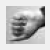

1/1 [==============================] - 0s 31ms/step
 predicting an A: 
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
 Largest Prediction index: 0
 predicting an A. Probability vector: 
[[0.11 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
  0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]]
Total of predictions: 1.000
np.argmax(prediction_p): A


In [17]:
y_encoded = label_encoder.fit_transform(y_test.ravel())


# Update the display_digit function to reshape images into (28, 28)
def display_char(X):
    fig, ax = plt.subplots(1, 1, figsize=(0.5, 0.5))
    widgvis(fig)
    X_reshaped = X.reshape((28, 28)).T
    ax.imshow(X_reshaped, cmap='gray')
    ax.axis('off')
    plt.show()


image_of_A = X_test[0]
display_char(image_of_A)

# Code Assignment starts here

prediction = model.predict(image_of_A.reshape(1,784))  # prediction

print(f" predicting an A: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

prediction_p = tf.nn.softmax(prediction)

print(f" predicting an A. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {char[yhat]}")

# Code Assigment stops here

1/1 [==============================] - 0s 20ms/step


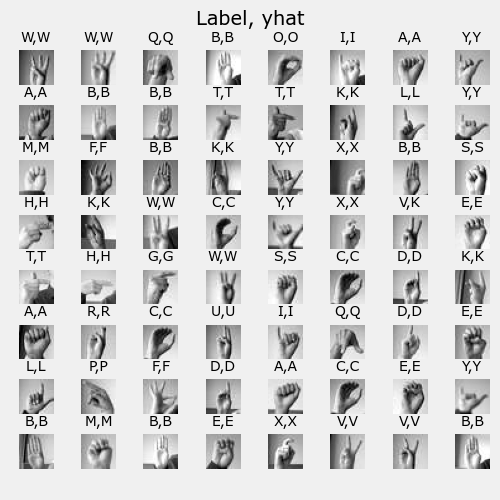

In [18]:
# Code Assigment starts here

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_test.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((28,28))

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X_test[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    

    # Display the label above the image
    ax.set_title(f"{y_test[random_index,0]},{char[yhat]}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

# Code Assigment stops here


## Accuracy for regularisation iteration 

In [23]:
def find_errors(model, X, y, label_encoder=None):
    predictions = model.predict(X)
    y_pred = np.argmax(predictions, axis=1)    
    def find_mismatches(y, yhat):
        return np.where(y != y_pred)[0]

    errors = find_mismatches(y, yhat)

    return len(errors)

# Assuming label_encoder is defined earlier in your code
for i in range(len(lambdas)):
    print(lambdas[i])
    E = find_errors(models[i], X_test, y_encoded, label_encoder)
    print(f"{E} errors out of {len(X_test)} images")
    accuracy = 100*(len(X_test)-E)/len(X_test)
    print(f" accuracy = {accuracy}")

10
225/225 [==============================] - 4s 19ms/step
6900 errors out of 7200 images
 accuracy = 4.166666666666667
0.001
225/225 [==============================] - 4s 19ms/step
6900 errors out of 7200 images
 accuracy = 4.166666666666667
0.0001
225/225 [==============================] - 4s 18ms/step
96 errors out of 7200 images
 accuracy = 98.66666666666667
5e-05
225/225 [==============================] - 4s 18ms/step
69 errors out of 7200 images
 accuracy = 99.04166666666667
1e-05
225/225 [==============================] - 4s 18ms/step
69 errors out of 7200 images
 accuracy = 99.04166666666667
1e-06
225/225 [==============================] - 4s 19ms/step
63 errors out of 7200 images
 accuracy = 99.125


<a name="9"></a>
## 9 - Visualisation of testing the model

This code will generate a bar chart, where for each character the amount of mismatches is presented.

225/225 [==============================] - 4s 19ms/step


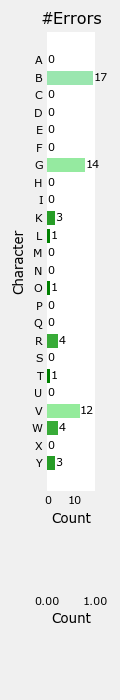

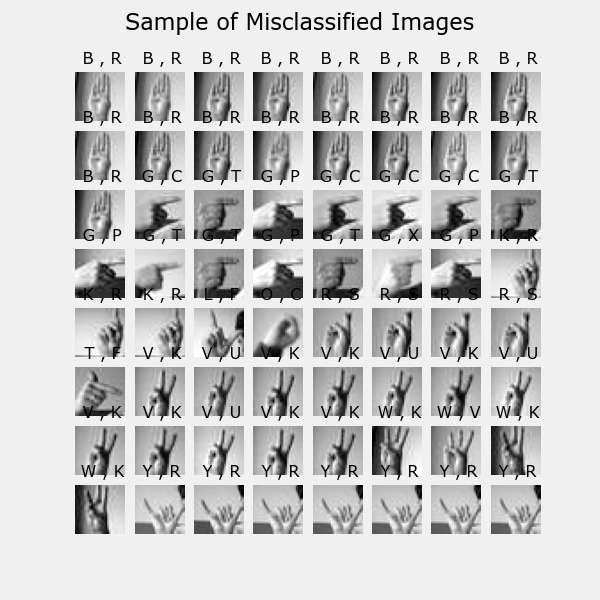

60 errors out of 7200 images
 accuracy = 99.16666666666667


In [19]:
# Code Assigment partially adapted

def display_errors(model, X, y, label_encoder=None):
    predictions = model.predict(X)
    y_pred = np.argmax(predictions, axis=1)    
    def find_mismatches(y, yhat):
        return np.where(y != y_pred)[0]

    errors = find_mismatches(y, yhat)
    wrong = []
    for i in range(0,len(errors)):
        wrong.append(label_encoder.inverse_transform([y[errors[i]]])[0])

   
    count_dict = {}
    for item in wrong:
        if item in count_dict:
            count_dict[item] += 1
        else:
            count_dict[item] = 1

    #for key, value in count_dict.items():
    #    print(f'{key} : {value}')   

    counts = [count_dict.get(char, 0) for char in char]

    
    ######    BARCHART!      ######

    counts_array = np.array(counts)
    custom_cmap = LinearSegmentedColormap.from_list(
        'custom_cmap',
        [(0, 'white'), (0.000001, 'yellow'), (0.03, 'orange'), (0.2, 'red'), (0.6, 'magenta'), (0.7, 'blue'),
         (0.9, 'lightblue'), (0.97, 'lightgreen'), (1, 'green')]
    )
    # Normalize counts to values between 0 and 1
    normalized_counts = (300 - counts_array) / (300)
    # Create a horizontal bar chart with the normalized counts
    plt.figure(figsize=(1.2, 7))  
    bars = plt.barh(char, counts_array, color=custom_cmap(normalized_counts))
    plt.xlabel('Count')
    plt.ylabel('Character')
    plt.title('#Errors')
    # Add the actual count value next to each bar
    for bar, count in zip(bars, counts):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count}', ha='left', va='center')
    # Add a colorbar for reference
    sm = plt.cm.ScalarMappable(cmap=custom_cmap)
    sm.set_array([])  # Set an empty array to avoid errors
    cbar = plt.colorbar(sm, orientation='horizontal', format='%.2f')
    cbar.set_label('Count')
    # Reverse the y-axis
    plt.gca().invert_yaxis()
    # Remove the gray border
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.tight_layout()
    plt.show()



    # Show errors in subplots
    fig, axes = plt.subplots(8, 8, figsize=(6, 6))
    fig.suptitle('Sample of Misclassified Images', fontsize=16)

    for i,ax in enumerate(axes.flat):
        #random_index = np.random.randint(len(errors)-1)
        if(i>=len(errors)):
            j = errors[len(errors)-1]
        else:
            j = errors[i]
        X_reshaped = X[j].reshape((28, 28))

        if label_encoder is not None:
            true_label = label_encoder.inverse_transform([y[j]])[0]
        else:
            true_label = y[j]

        ax.imshow(X_reshaped, cmap='gray')
        ax.set_title(f' {true_label} , {char[y_pred[j]]}')
        ax.axis('off')
        
    plt.show()

    return len(errors)

# Assuming label_encoder is defined earlier in your code
E = display_errors(model, X_test, y_encoded, label_encoder)
print(f"{E} errors out of {len(X_test)} images")
accuracy = 100*(len(X_test)-E)/len(X_test)
print(f" accuracy = {accuracy}")

This code will generate a Confusion matrix. This indicates where the mismatches happen, 
from which character it is supposed to be detected to which it actually detects.
If the corresping true and predicted label is dark green and '1' it is (almost) perfectly detected. If this is more blue, or even purple, then the model does not accuratly detect that character.

On the other hand if the error is more red, instead of yellow, the falsly detected character will be more predicted as another character.

225/225 [==============================] - 4s 18ms/step


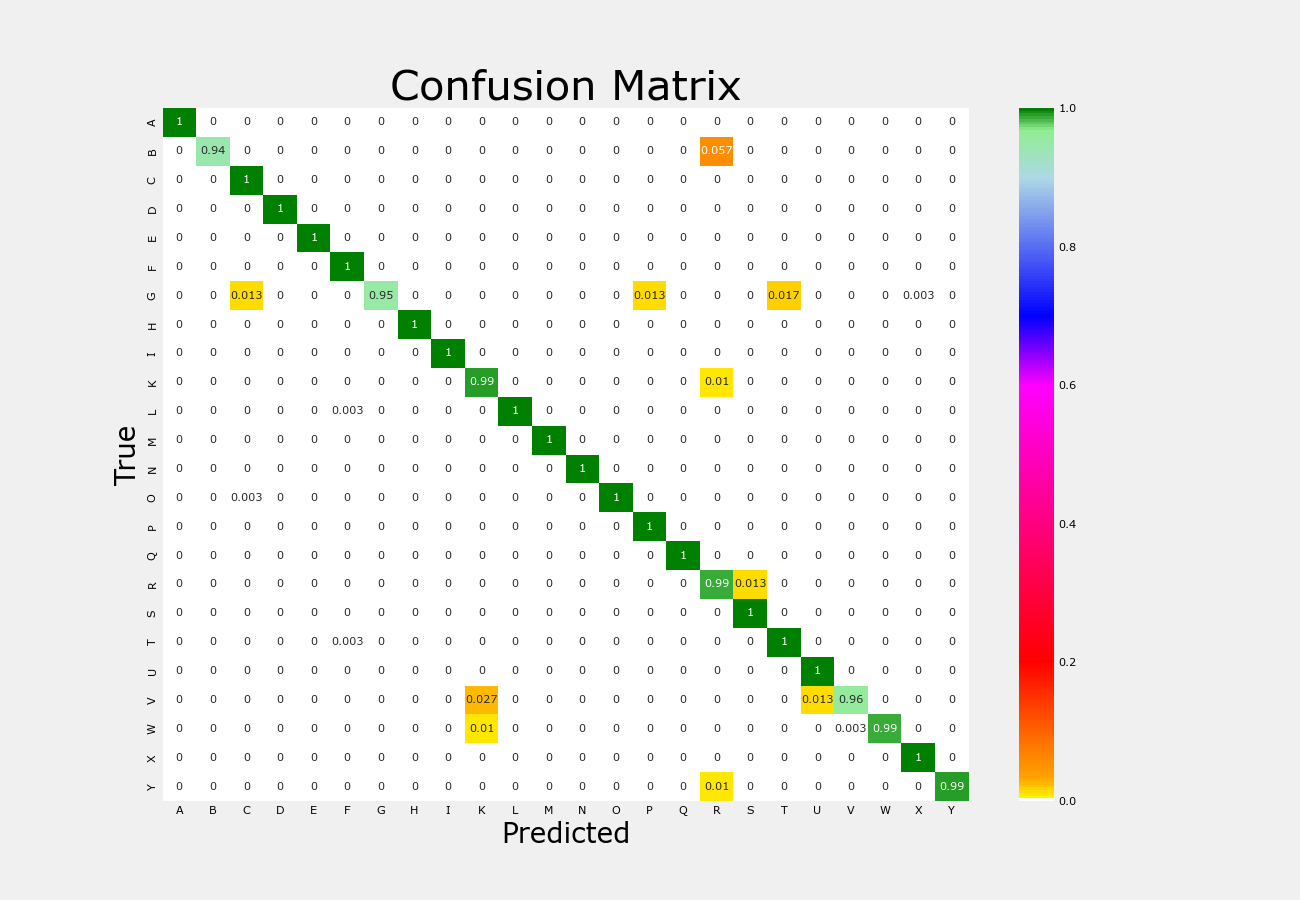

In [20]:
y_pred = np.argmax(model.predict(X_test), axis=1) 

char_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K',
                10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S', 18: 'T',
                19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'}

# Convert numerical predictions to characters
y_pred_chars = np.vectorize(char_mapping.get)(y_pred)

conf_matrix = confusion_matrix(y_test.ravel(), y_pred_chars)
conf_matrix_normalized = conf_matrix / np.max(conf_matrix)

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        element = conf_matrix[i][j]
        conf_matrix_normalized[i][j] = rounded_float = round(conf_matrix_normalized[i][j], 3)
        if(element == 300):
            conf_matrix_normalized[i][j] = 1
        elif(element == 0):
            conf_matrix_normalized[i][j] = 0

custom_cmap = LinearSegmentedColormap.from_list(
    'custom_cmap',
    [(0, 'white'), (0.000001, 'yellow'), (0.03, 'orange'), (0.2,'red'), (0.6,'magenta'), (0.7,'blue'),(0.9, 'lightblue'),(0.97, 'lightgreen'),(1,'green')]
)

# Plot confusion matrix
plt.figure(figsize=(13, 9))
sns.heatmap(conf_matrix_normalized, annot=True, cmap=custom_cmap, xticklabels=char, yticklabels=char)
plt.title('Confusion Matrix', fontsize=30)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('True', fontsize=20)
plt.show()
